# Customer Segmentation and Analysis 

## Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
from sklearn.metrics import silhouette_score, davies_bouldin_score
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Data Exploration

In [2]:
df = pd.read_csv(r'../Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

### Count Plot of Gender

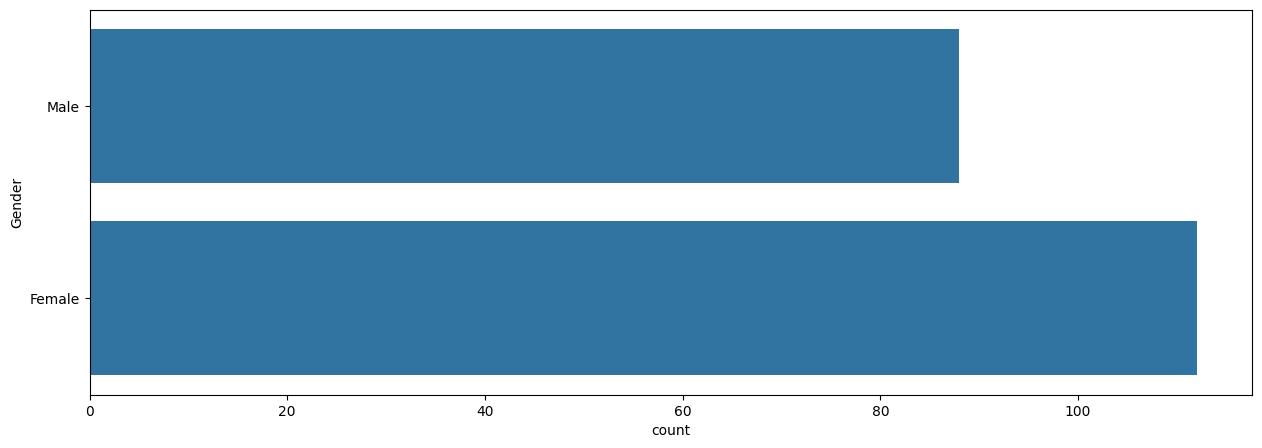

In [5]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Histograms

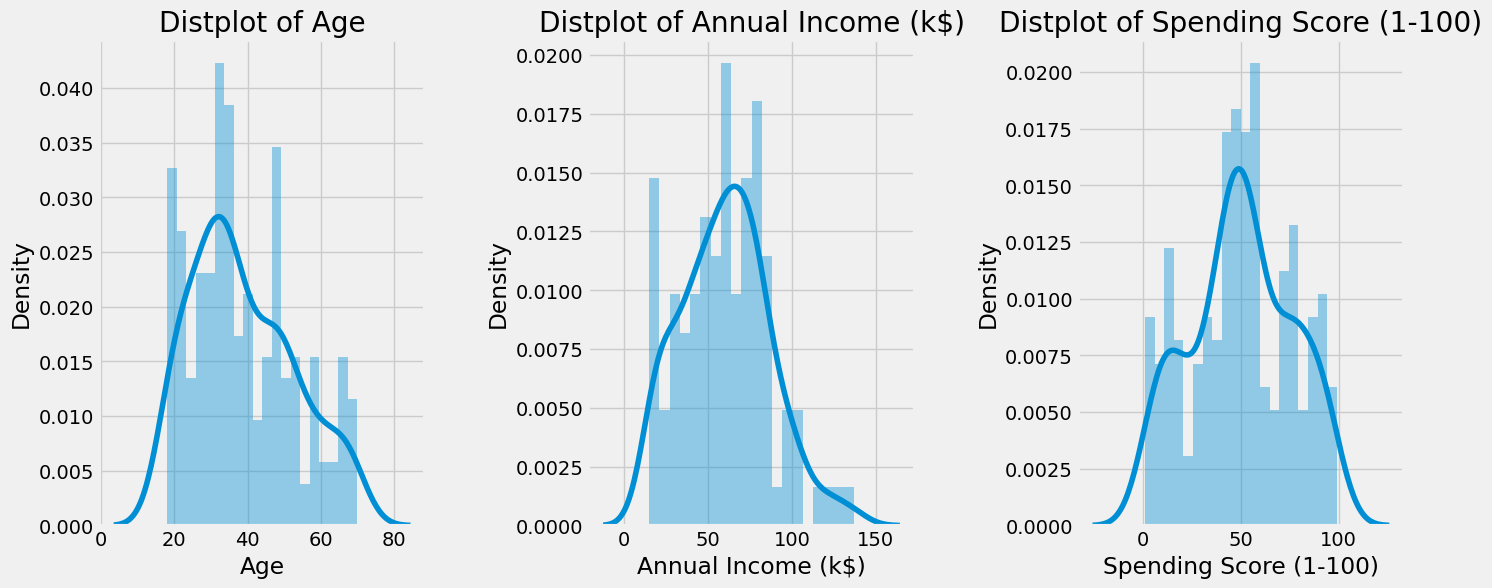

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

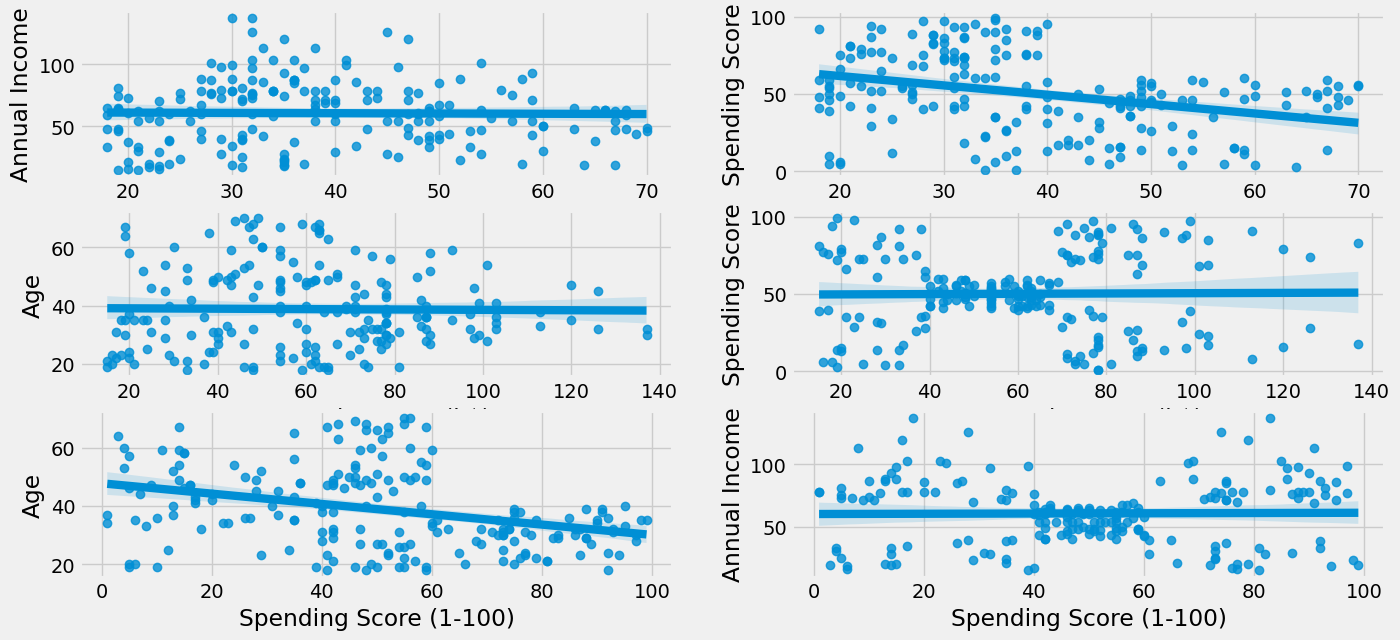

In [7]:
plt.figure(1, figsize=(15, 7))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        if x != y:  # Skip if x and y are the same
            n += 1
            plt.subplot(3, 2, n)
            sns.regplot(x=x, y=y, data=df)
            plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)
plt.show()


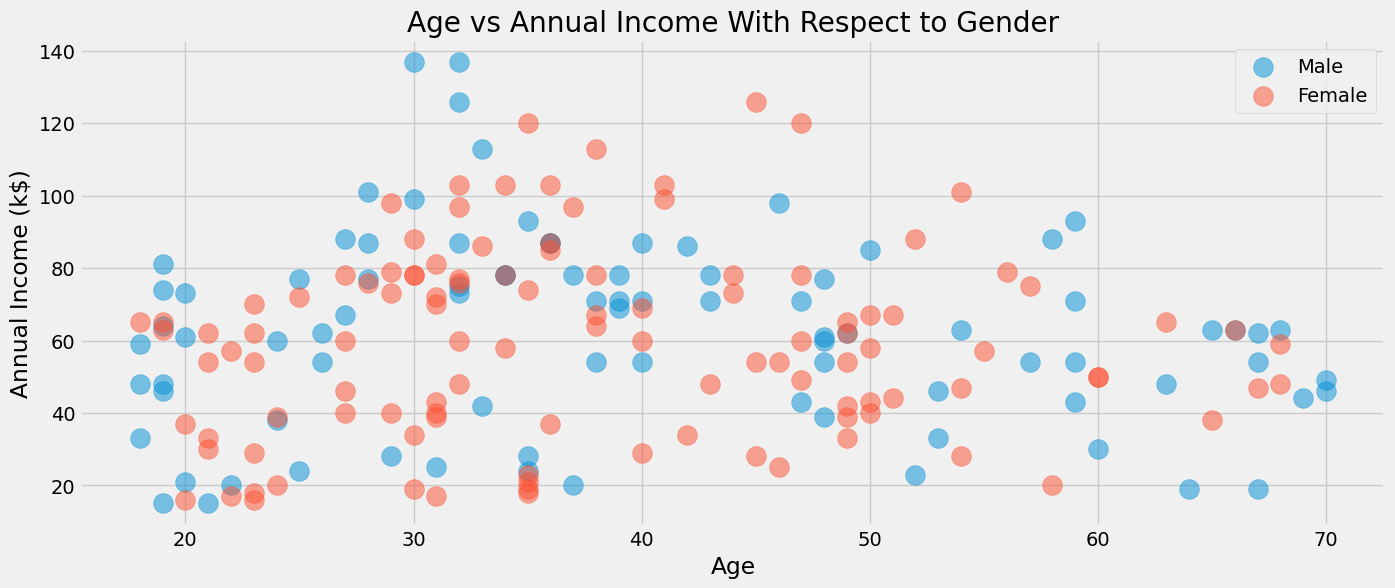

In [8]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income With Respect to Gender')
plt.legend()
plt.show()

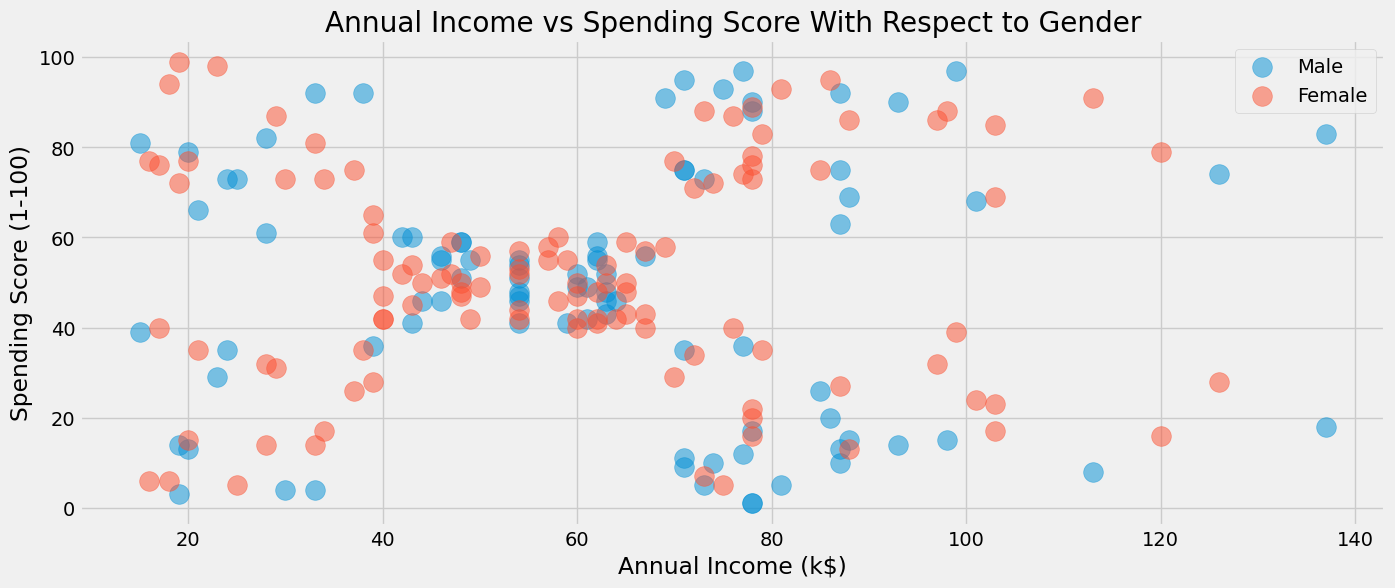

In [9]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score With Respect to Gender')
plt.legend()
plt.show()

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [10]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

  File "c:\Users\AyhanÇavdar\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AyhanÇavdar\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AyhanÇavdar\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\AyhanÇavdar\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


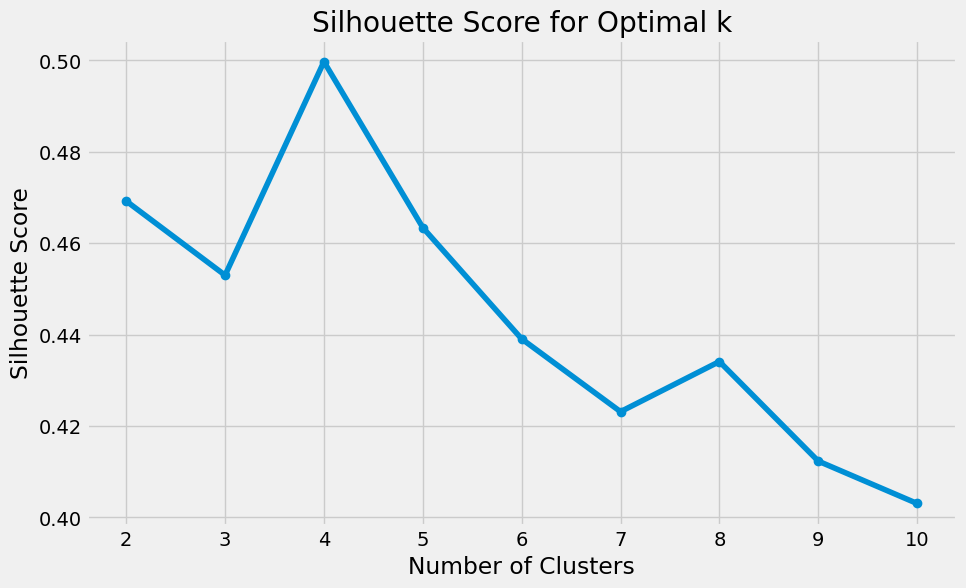

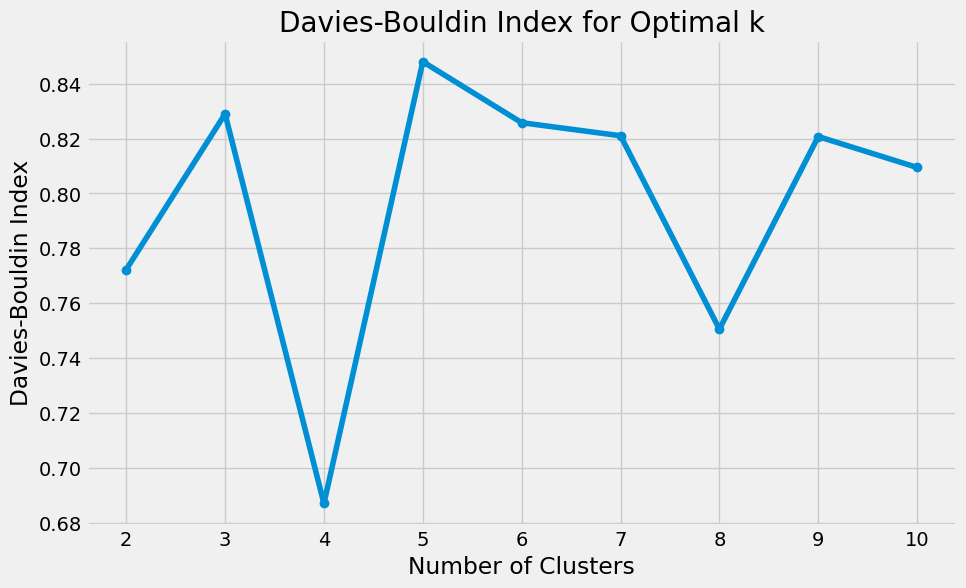

In [11]:

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X1)
    silhouette_scores.append(silhouette_score(X1, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X1)
    db_scores.append(davies_bouldin_score(X1, kmeans.labels_))

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [12]:
# 4 is chosen as optimal cluster number
algorithm = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [13]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

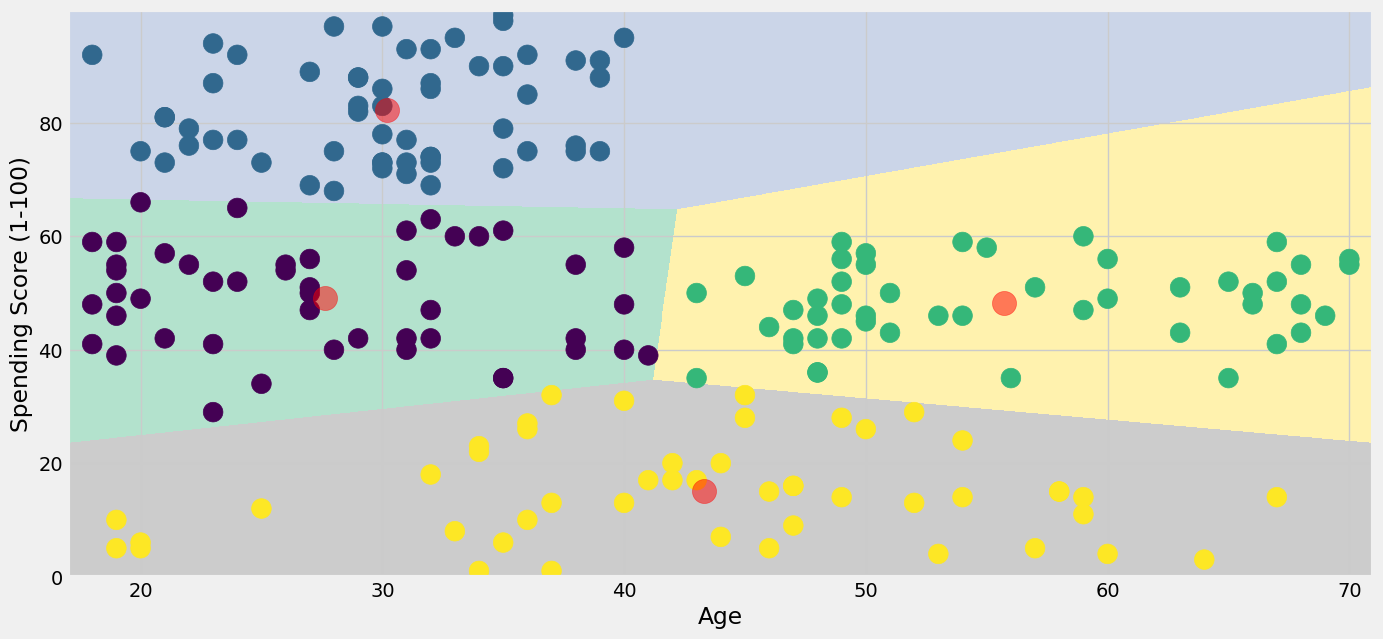

In [14]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using  Annual Income and Spending Score

In [15]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

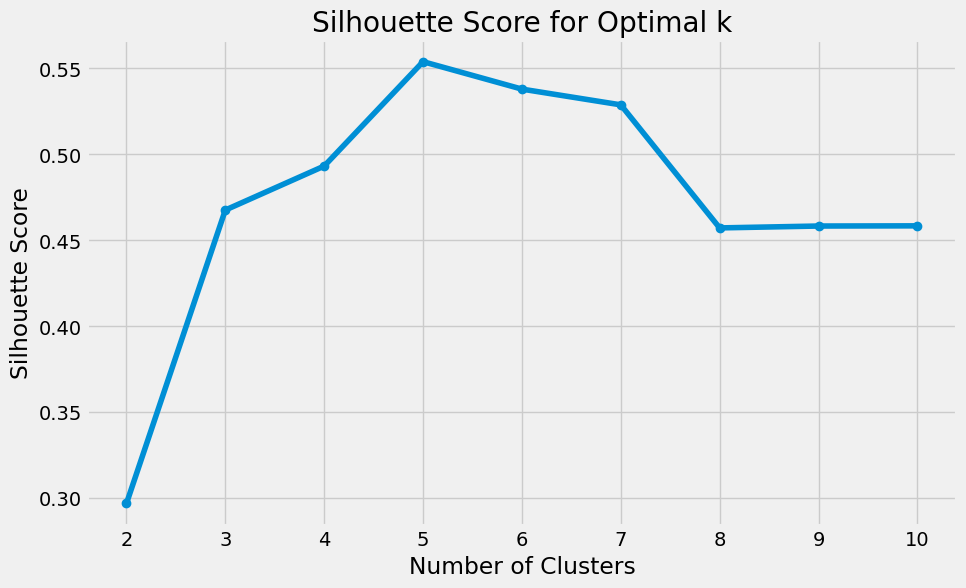

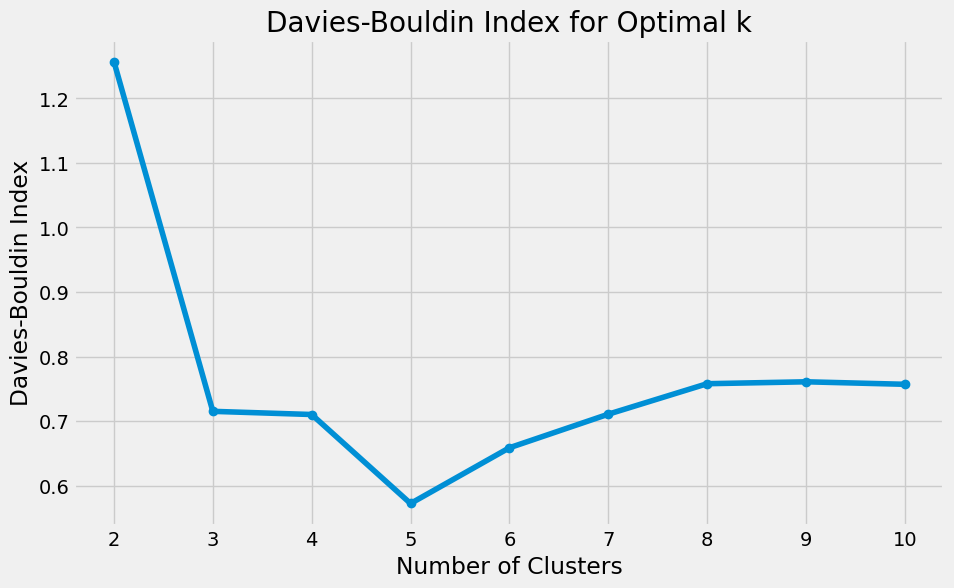

In [16]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X2)
    silhouette_scores.append(silhouette_score(X2, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X2)
    db_scores.append(davies_bouldin_score(X2, kmeans.labels_))

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [17]:
# 5 is chosen as optimal cluster number
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [18]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

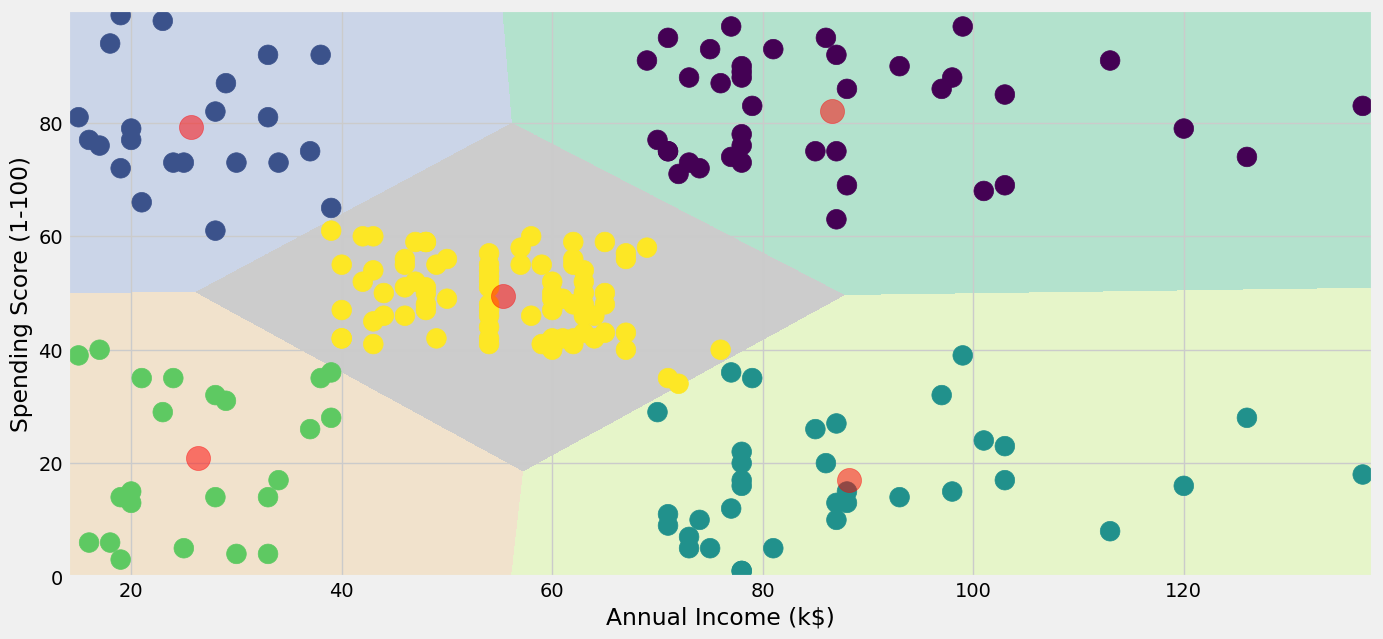

In [19]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [20]:
'''Age, Annual Income, Spending Score'''

X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

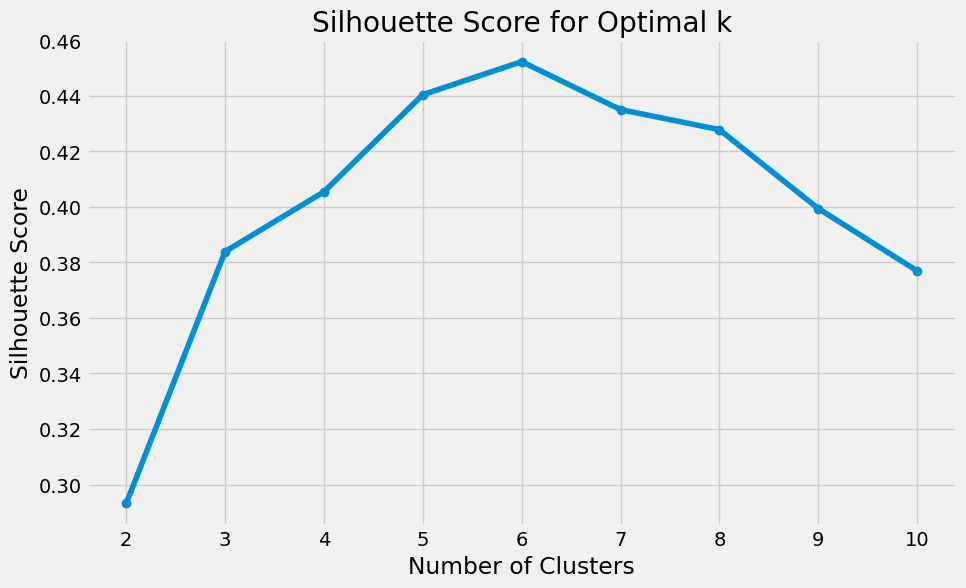

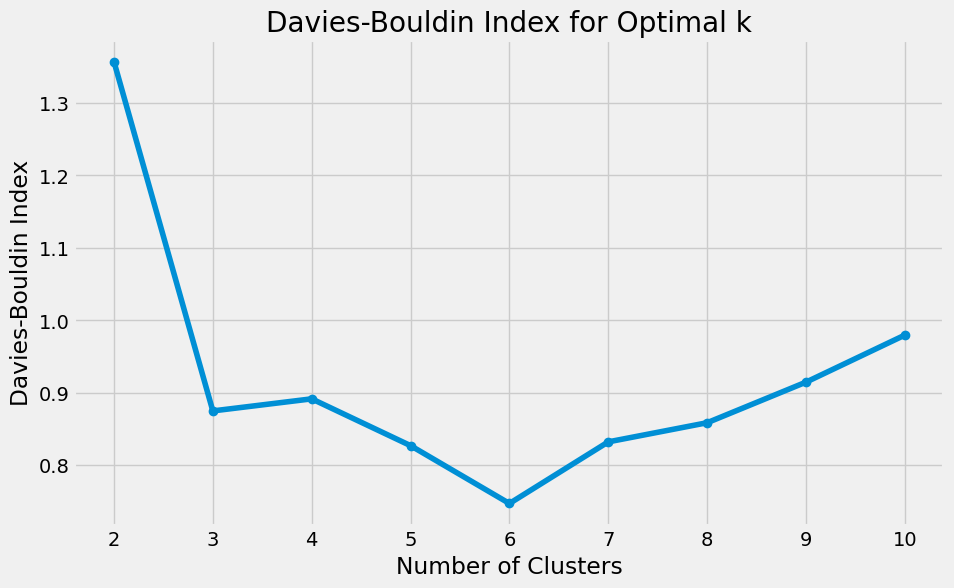

In [21]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X3)
    silhouette_scores.append(silhouette_score(X3, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
    kmeans.fit(X3)
    db_scores.append(davies_bouldin_score(X3, kmeans.labels_))

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [22]:
# 6 is chosen as optimal cluster number
algorithm = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [23]:
# Creating meshgrid for visualization
h = 2
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
z_min, z_max = X3[:, 2].min() - 1, X3[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

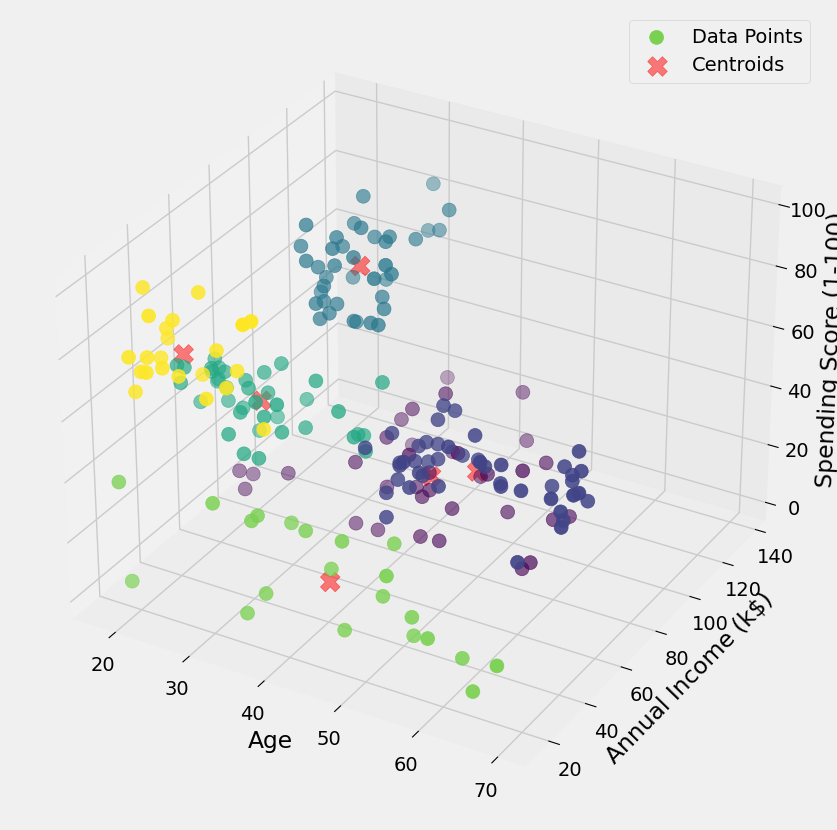

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
Z3 = Z3.reshape(xx.shape)

# Scatter plot for data points
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=labels3, marker='o', s=100, label='Data Points')

# Scatter plot for centroids
ax.scatter(centroids3[:, 0], centroids3[:, 1], centroids3[:, 2], c='red', marker='X', s=200, alpha=0.5, label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()